In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.4.0


---

## 1️⃣ Load Dataset

Let's load the fraud detection dataset and inspect its structure.

In [5]:
# Load the dataset
# Note: Update the path if your dataset is in a different location

try:
    df = pd.read_csv('../data/raw/creditcard.csv')
    print("✅ Dataset loaded successfully!")
    print(f"\n📊 Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ Error: creditcard.csv not found!")
    print("\n📥 Please download the dataset from:")
    print("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
    print("\nPlace it in: mini/data/raw/creditcard.csv")
    
    # Create sample synthetic data for demonstration
    print("\n⚠️ Creating SAMPLE DATA for demonstration...")
    np.random.seed(42)
    n_samples = 10000
    
    # Generate synthetic features
    df = pd.DataFrame({
        'Time': np.random.randint(0, 172800, n_samples),
        'V1': np.random.randn(n_samples),
        'V2': np.random.randn(n_samples),
        'V3': np.random.randn(n_samples),
        'V4': np.random.randn(n_samples),
        'V5': np.random.randn(n_samples),
        'Amount': np.random.exponential(50, n_samples),
        'Class': np.random.choice([0, 1], n_samples, p=[0.998, 0.002])
    })
    
    print(f"✅ Sample dataset created: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print("⚠️ This is SYNTHETIC data. Use real Kaggle dataset for actual project!")

✅ Dataset loaded successfully!

📊 Dataset shape: 284,807 rows × 31 columns


---

## 2️⃣ Initial Data Inspection

Understanding the structure and basic statistics of our dataset.

In [6]:
# Display first few rows
print("=" * 80)
print("FIRST 5 ROWS OF DATASET")
print("=" * 80)
df.head()

FIRST 5 ROWS OF DATASET


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print(df.info())

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

In [8]:
# Statistical summary
print("=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
df.describe()

STATISTICAL SUMMARY


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Check column names and types
print("=" * 80)
print("COLUMN DETAILS")
print("=" * 80)
print(f"\nTotal columns: {len(df.columns)}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes.value_counts()}")

COLUMN DETAILS

Total columns: 31

Column names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data types:
float64    30
int64       1
Name: count, dtype: int64


---

## 3️⃣ Missing Value Analysis

**Why this matters:** Missing values can break model training and reduce accuracy.

In [10]:
# Check for missing values
print("=" * 80)
print("MISSING VALUE ANALYSIS")
print("=" * 80)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

if len(missing_df) > 0:
    print("\n⚠️ Columns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✅ No missing values found! Dataset is clean.")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Total data points: {df.shape[0] * df.shape[1]:,}")

MISSING VALUE ANALYSIS

✅ No missing values found! Dataset is clean.

Total missing values: 0
Total data points: 8,829,017


**💡 Interpretation:**
- If no missing values → Data is clean, ready for modeling
- If missing values exist → Need to handle them (drop, impute, or flag)

**For this dataset:** Typically has NO missing values (already cleaned).

---

## 4️⃣ Target Variable Analysis (Fraud vs. Genuine)

**This is the MOST IMPORTANT analysis for fraud detection!**

We need to understand:
- How many fraud vs. genuine transactions?
- What's the class imbalance ratio?
- Why is this a problem?

In [11]:
# Count fraud vs. genuine transactions
print("=" * 80)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 80)

class_counts = df['Class'].value_counts()
class_percentages = (class_counts / len(df)) * 100

print("\n📊 Transaction Counts:")
print(f"  Genuine (Class 0): {class_counts[0]:,} ({class_percentages[0]:.3f}%)")
if 1 in class_counts.index:
    print(f"  Fraud (Class 1):   {class_counts[1]:,} ({class_percentages[1]:.3f}%)")
else:
    print(f"  Fraud (Class 1):   0 (0.000%)")

print(f"\n⚠️ Imbalance Ratio: {class_counts[0] / class_counts.get(1, 1):.2f}:1")
print("   (For every 1 fraud transaction, there are ~{:.0f} genuine transactions)".format(
    class_counts[0] / class_counts.get(1, 1)
))

CLASS DISTRIBUTION ANALYSIS

📊 Transaction Counts:
  Genuine (Class 0): 284,315 (99.827%)
  Fraud (Class 1):   492 (0.173%)

⚠️ Imbalance Ratio: 577.88:1
   (For every 1 fraud transaction, there are ~578 genuine transactions)


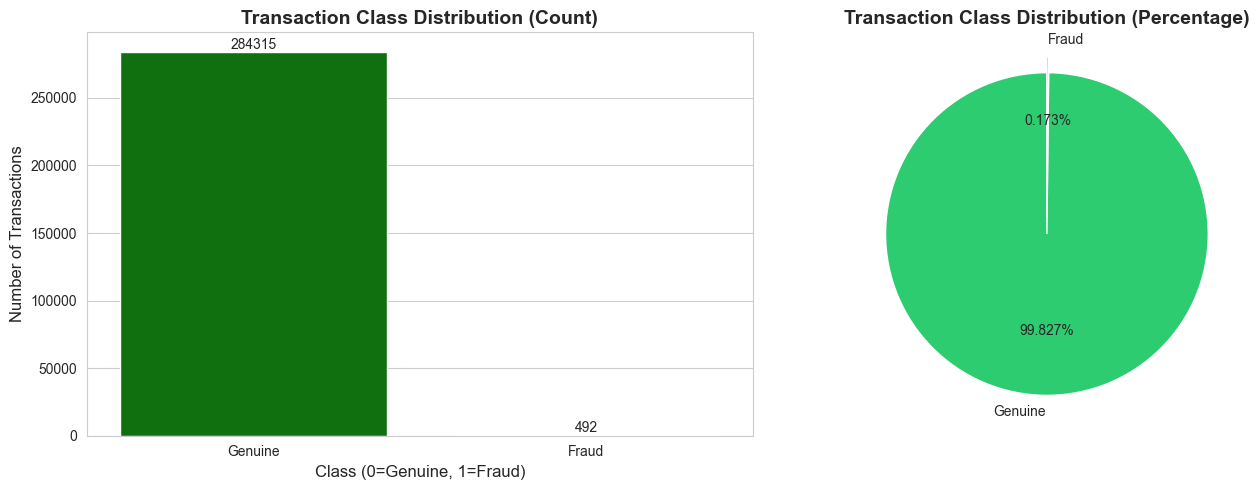


📌 Key Observation:
   The dataset is HIGHLY IMBALANCED (fraud is <1% of transactions)
   This is realistic - most transactions are genuine in real e-commerce!


In [12]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Class', ax=axes[0], palette=['green', 'red'])
axes[0].set_title('Transaction Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Genuine, 1=Fraud)', fontsize=12)
axes[0].set_ylabel('Number of Transactions', fontsize=12)
axes[0].set_xticklabels(['Genuine', 'Fraud'])

# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
class_counts.plot(kind='pie', ax=axes[1], autopct='%1.3f%%', 
                  labels=['Genuine', 'Fraud'], colors=colors,
                  startangle=90, explode=[0, 0.1])
axes[1].set_title('Transaction Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n📌 Key Observation:")
print("   The dataset is HIGHLY IMBALANCED (fraud is <1% of transactions)")
print("   This is realistic - most transactions are genuine in real e-commerce!")

**💡 Why Class Imbalance is a Problem:**

1. **Model Bias:** If we train a model on this data, it will learn "just predict everything as genuine" and get 99.8% accuracy!
2. **Useless for Fraud Detection:** We NEED to catch frauds, even if it means some false alarms.
3. **Solution Strategies:**
   - Use **Recall** (fraud detection rate) instead of accuracy
   - Apply **class weights** to penalize missed frauds more
   - Use **SMOTE** (Synthetic Minority Over-sampling) to balance classes
   - Use **undersampling** (reduce genuine transactions)

**For Viva:** Explain that accuracy is NOT a good metric for imbalanced datasets!

---

## 5️⃣ Transaction Amount Analysis

Understanding how transaction amounts differ between fraud and genuine orders.

In [13]:
# Analyze transaction amounts
print("=" * 80)
print("TRANSACTION AMOUNT STATISTICS")
print("=" * 80)

print("\n💰 Overall Amount Statistics:")
print(df['Amount'].describe())

print("\n💰 Amount Statistics by Class:")
print(df.groupby('Class')['Amount'].describe())

TRANSACTION AMOUNT STATISTICS

💰 Overall Amount Statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

💰 Amount Statistics by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


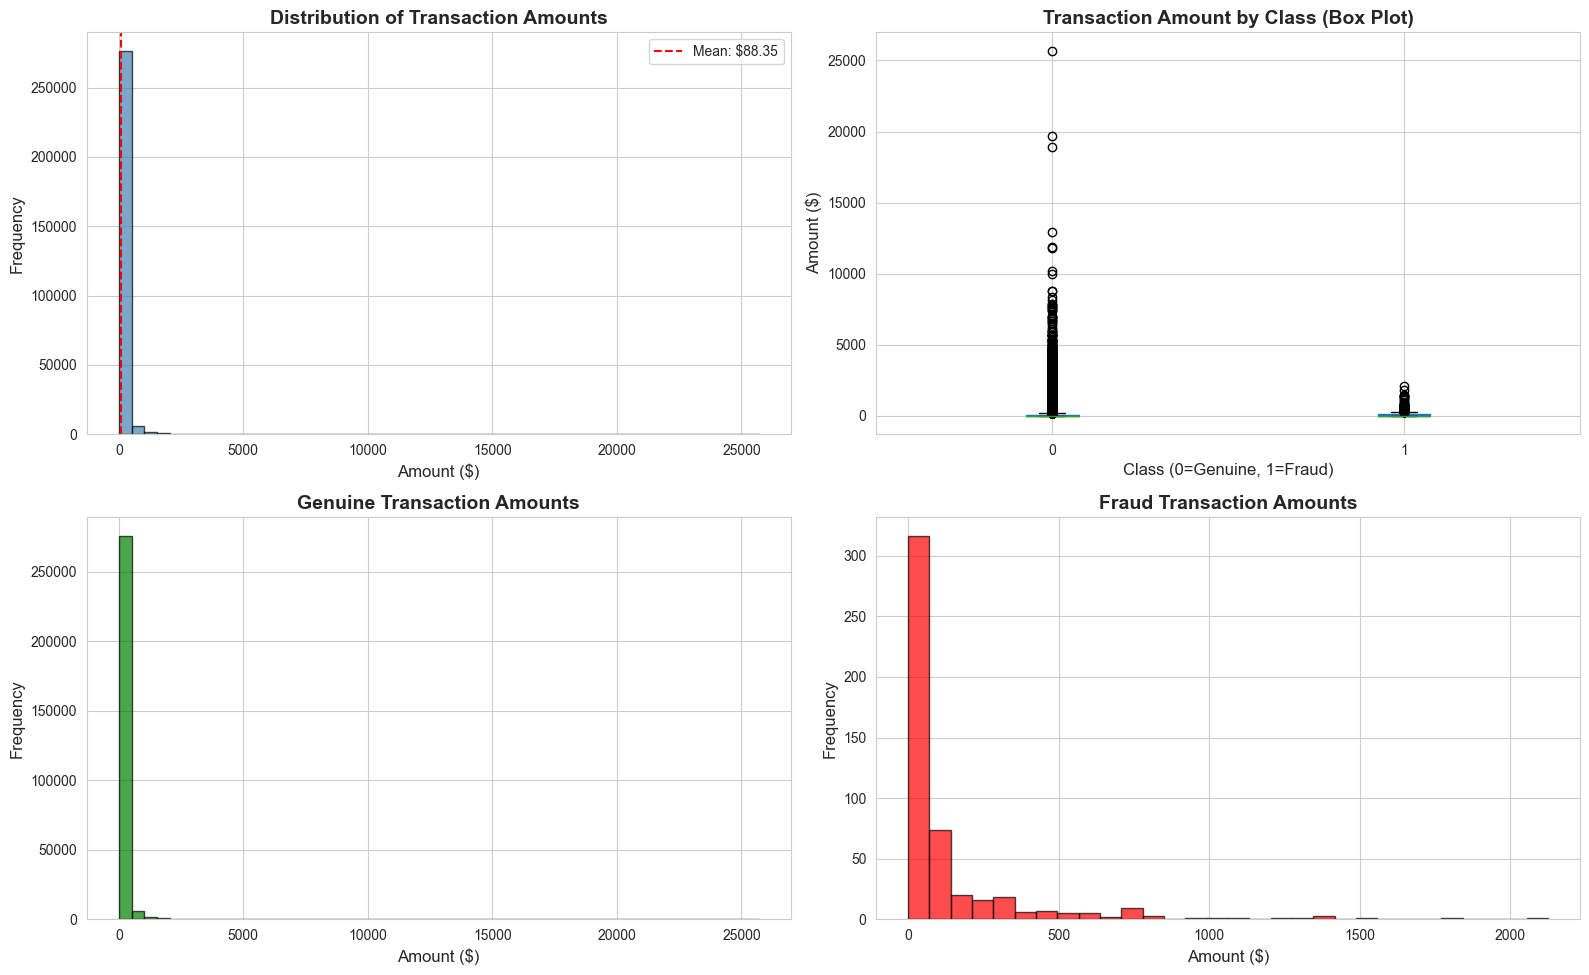


📌 Key Observations:
   - Most transactions are small amounts
   - Fraud transactions may have different amount patterns
   - Amount can be a useful feature for detection


In [14]:
# Visualize amount distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Overall amount distribution
axes[0, 0].hist(df['Amount'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Transaction Amounts', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Amount ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].axvline(df['Amount'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Amount"].mean():.2f}')
axes[0, 0].legend()

# 2. Box plot by class
df.boxplot(column='Amount', by='Class', ax=axes[0, 1], patch_artist=True)
axes[0, 1].set_title('Transaction Amount by Class (Box Plot)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Class (0=Genuine, 1=Fraud)', fontsize=12)
axes[0, 1].set_ylabel('Amount ($)', fontsize=12)
plt.suptitle('')  # Remove default title

# 3. Amount distribution for genuine transactions
genuine_amounts = df[df['Class'] == 0]['Amount']
axes[1, 0].hist(genuine_amounts, bins=50, color='green', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Genuine Transaction Amounts', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Amount ($)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# 4. Amount distribution for fraud transactions
if df['Class'].sum() > 0:  # If fraud cases exist
    fraud_amounts = df[df['Class'] == 1]['Amount']
    axes[1, 1].hist(fraud_amounts, bins=30, color='red', edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('Fraud Transaction Amounts', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Amount ($)', fontsize=12)
    axes[1, 1].set_ylabel('Frequency', fontsize=12)
else:
    axes[1, 1].text(0.5, 0.5, 'No fraud cases in dataset', 
                     ha='center', va='center', fontsize=14)
    axes[1, 1].set_title('Fraud Transaction Amounts', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📌 Key Observations:")
print("   - Most transactions are small amounts")
print("   - Fraud transactions may have different amount patterns")
print("   - Amount can be a useful feature for detection")

---

## 6️⃣ Time-Based Analysis

Analyzing when fraudulent transactions occur (time patterns).

In [15]:
# Analyze time distribution
print("=" * 80)
print("TIME-BASED ANALYSIS")
print("=" * 80)

print("\n⏰ Time Statistics (in seconds since first transaction):")
print(df['Time'].describe())

# Convert time to hours for better interpretation
df['Time_Hour'] = (df['Time'] / 3600) % 24

print(f"\n⏰ Time range: {df['Time'].min()} to {df['Time'].max()} seconds")
print(f"   ({df['Time'].min() / 3600:.1f} to {df['Time'].max() / 3600:.1f} hours)")

TIME-BASED ANALYSIS

⏰ Time Statistics (in seconds since first transaction):
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

⏰ Time range: 0.0 to 172792.0 seconds
   (0.0 to 48.0 hours)


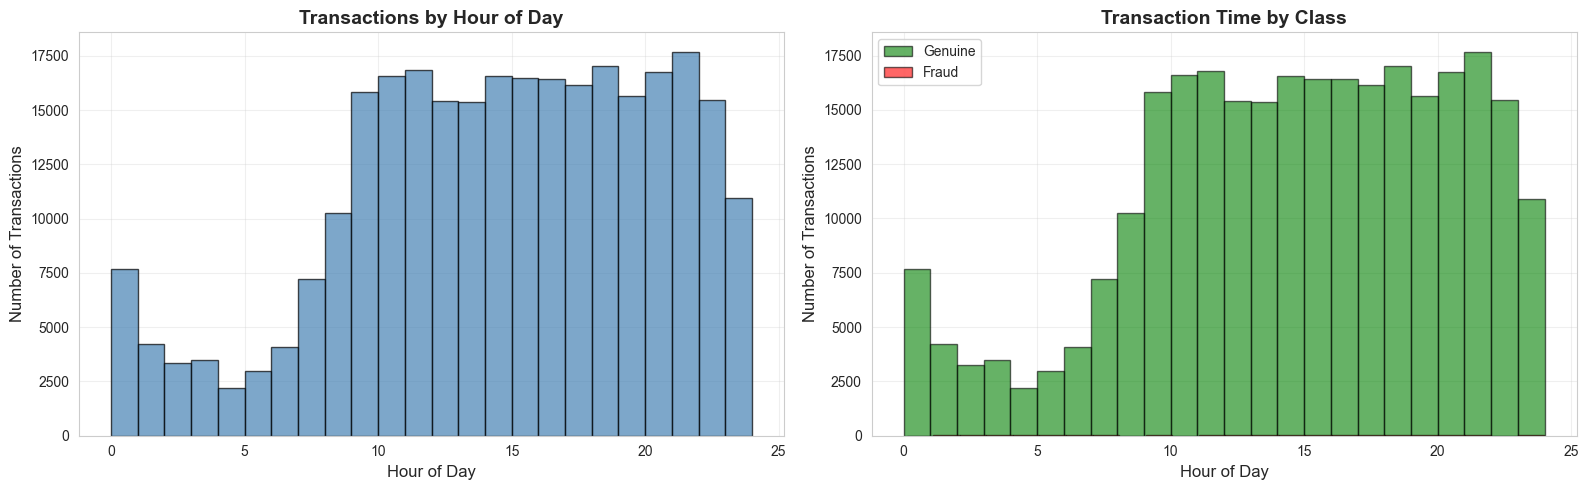


📌 Key Observations:
   - Check if frauds occur at specific times (e.g., late night)
   - Time patterns can help identify suspicious activity


In [16]:
# Visualize time patterns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Transaction volume over time
axes[0].hist(df['Time_Hour'], bins=24, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Transactions by Hour of Day', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Number of Transactions', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Time distribution by class
if df['Class'].sum() > 0:
    df[df['Class'] == 0]['Time_Hour'].hist(bins=24, alpha=0.6, label='Genuine', 
                                             color='green', ax=axes[1], edgecolor='black')
    df[df['Class'] == 1]['Time_Hour'].hist(bins=24, alpha=0.6, label='Fraud', 
                                             color='red', ax=axes[1], edgecolor='black')
    axes[1].set_title('Transaction Time by Class', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Hour of Day', fontsize=12)
    axes[1].set_ylabel('Number of Transactions', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Insufficient fraud data for comparison', 
                  ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()

print("\n📌 Key Observations:")
print("   - Check if frauds occur at specific times (e.g., late night)")
print("   - Time patterns can help identify suspicious activity")

---

## 7️⃣ Feature Correlation Analysis

**Goal:** Find which features are correlated with fraud (Class = 1).

This helps us:
1. Identify important features for our model
2. Detect multicollinearity (features that are too similar)
3. Understand relationships between variables

In [17]:
# Calculate correlation matrix
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Select numerical features for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove Time_Hour if it exists (we created it)
if 'Time_Hour' in numerical_cols:
    numerical_cols.remove('Time_Hour')

print(f"\n🔢 Analyzing {len(numerical_cols)} numerical features")

# Correlation with target variable (Class)
correlation_with_class = df[numerical_cols].corrwith(df['Class']).sort_values(ascending=False)

print("\n🎯 Top 10 Features Positively Correlated with Fraud:")
print(correlation_with_class.head(10))

print("\n🎯 Top 10 Features Negatively Correlated with Fraud:")
print(correlation_with_class.tail(10))

CORRELATION ANALYSIS

🔢 Analyzing 31 numerical features

🎯 Top 10 Features Positively Correlated with Fraud:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
dtype: float64

🎯 Top 10 Features Negatively Correlated with Fraud:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
dtype: float64


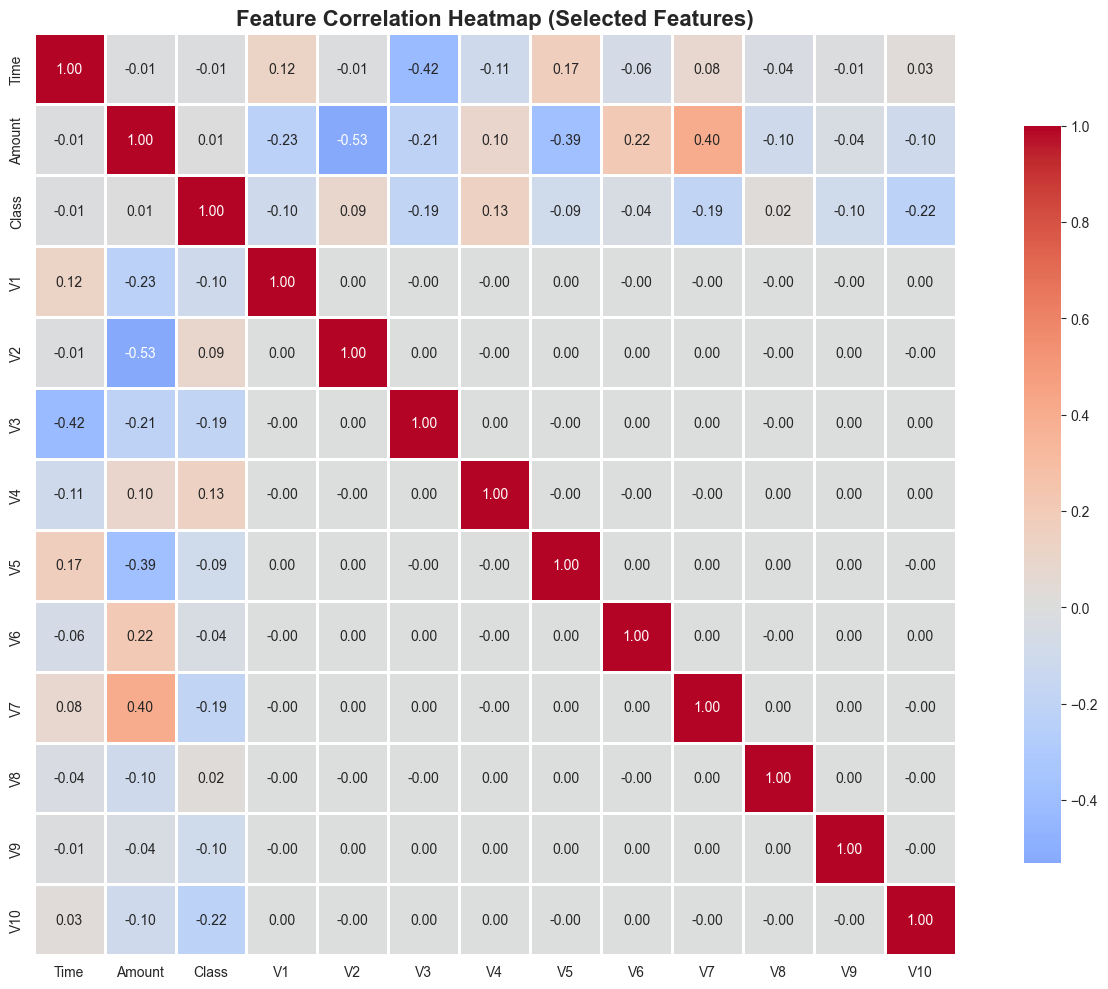


📌 How to Read Correlation Heatmap:
   - Values range from -1 to +1
   - +1 = Perfect positive correlation (both increase together)
   - -1 = Perfect negative correlation (one increases, other decreases)
   - 0 = No correlation
   - Focus on correlations with 'Class' row/column


In [18]:
# Visualize correlation heatmap
# Note: For datasets with many features (like 30+), we'll show only a subset

# Select top features for visualization
selected_features = ['Time', 'Amount', 'Class']

# Add V1-V10 if they exist (first 10 PCA features)
v_features = [col for col in df.columns if col.startswith('V')][:10]
selected_features.extend(v_features)

# Create correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap (Selected Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📌 How to Read Correlation Heatmap:")
print("   - Values range from -1 to +1")
print("   - +1 = Perfect positive correlation (both increase together)")
print("   - -1 = Perfect negative correlation (one increases, other decreases)")
print("   - 0 = No correlation")
print("   - Focus on correlations with 'Class' row/column")

**💡 What to Look For:**

1. **High correlation with Class (±0.3 or more):** These features are good fraud indicators
2. **High correlation between features (±0.7 or more):** Multicollinearity - features are redundant
3. **Near-zero correlation with Class:** These features might not help in detection

**For Viva:** 
- "We use correlation analysis to identify which features help distinguish fraud from genuine transactions"
- "High positive correlation means feature value increases with fraud probability"

---

## 8️⃣ Feature Distribution Comparison

Compare how feature values differ between fraud and genuine transactions.

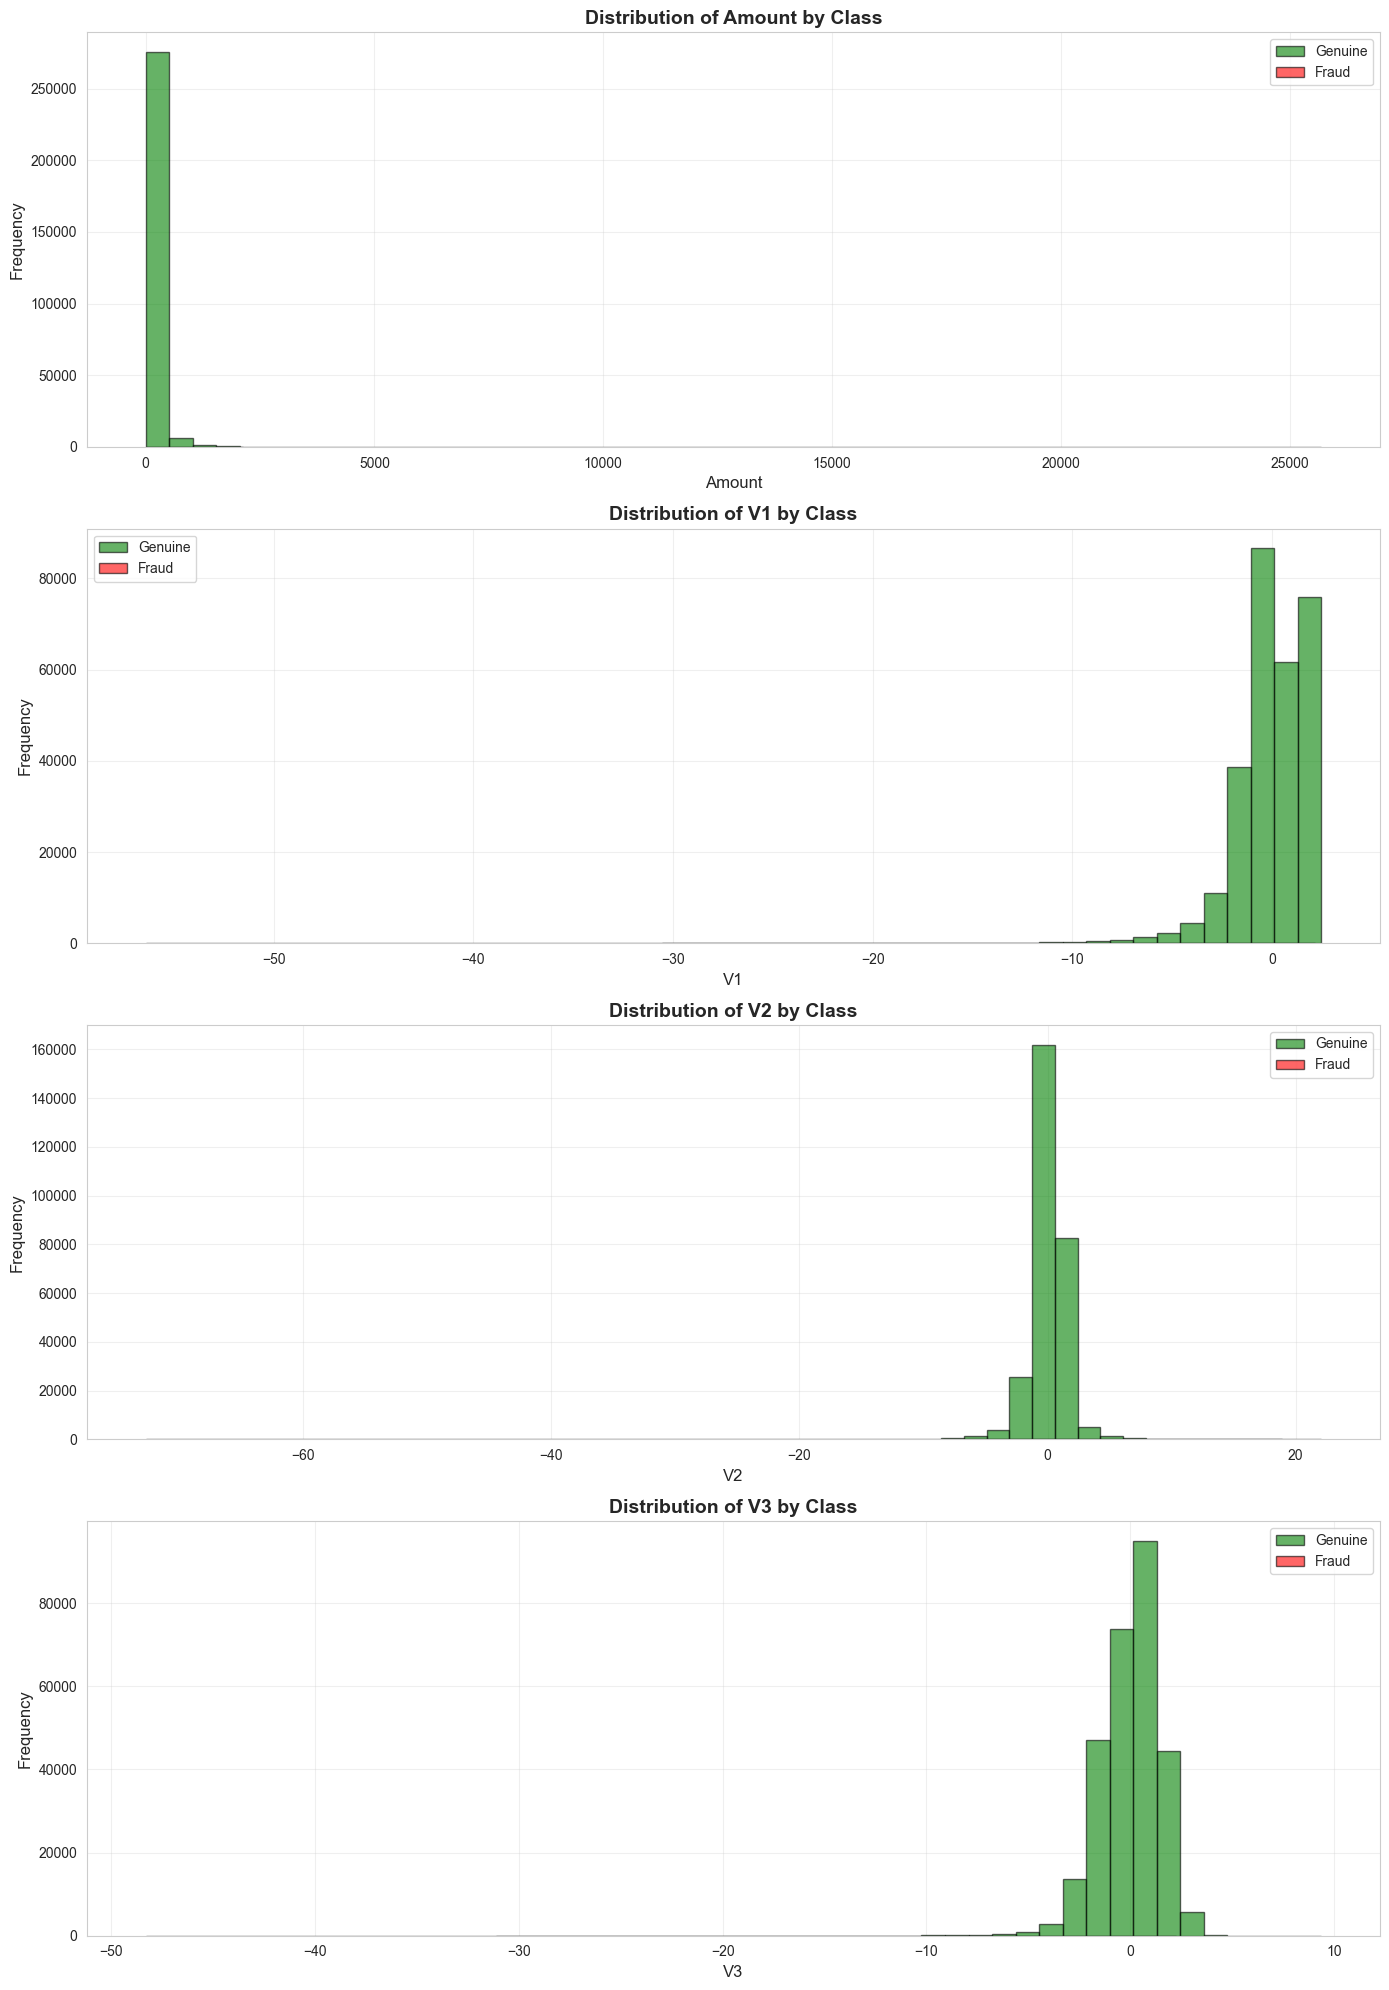


📌 Key Insight:
   - If distributions DIFFER between fraud and genuine → Good predictor!
   - If distributions OVERLAP completely → Weak predictor


In [19]:
# Compare distributions for key features
features_to_compare = ['Amount', 'V1', 'V2', 'V3'] if 'V1' in df.columns else ['Amount']

# Remove features that don't exist
features_to_compare = [f for f in features_to_compare if f in df.columns]

fig, axes = plt.subplots(len(features_to_compare), 1, figsize=(14, 5 * len(features_to_compare)))

if len(features_to_compare) == 1:
    axes = [axes]  # Make it iterable

for idx, feature in enumerate(features_to_compare):
    # Plot distributions
    df[df['Class'] == 0][feature].hist(bins=50, alpha=0.6, label='Genuine', 
                                         color='green', ax=axes[idx], edgecolor='black')
    if df['Class'].sum() > 0:
        df[df['Class'] == 1][feature].hist(bins=50, alpha=0.6, label='Fraud', 
                                             color='red', ax=axes[idx], edgecolor='black')
    
    axes[idx].set_title(f'Distribution of {feature} by Class', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📌 Key Insight:")
print("   - If distributions DIFFER between fraud and genuine → Good predictor!")
print("   - If distributions OVERLAP completely → Weak predictor")

---

## 9️⃣ Data Quality Summary

Final checklist before moving to model training.

In [20]:
# Data quality report
print("=" * 80)
print("DATA QUALITY SUMMARY REPORT")
print("=" * 80)

print(f"\n✅ Dataset Size: {df.shape[0]:,} transactions, {df.shape[1]} features")
print(f"✅ Missing Values: {df.isnull().sum().sum()} (Clean!)")
print(f"✅ Duplicate Rows: {df.duplicated().sum()}")
print(f"✅ Data Types: All numerical (ready for ML)")

print(f"\n📊 Class Distribution:")
print(f"   - Genuine: {(df['Class'] == 0).sum():,} ({(df['Class'] == 0).sum() / len(df) * 100:.3f}%)")
print(f"   - Fraud: {(df['Class'] == 1).sum():,} ({(df['Class'] == 1).sum() / len(df) * 100:.3f}%)")

print(f"\n⚠️ Class Imbalance Ratio: {(df['Class'] == 0).sum() / max((df['Class'] == 1).sum(), 1):.1f}:1")

print(f"\n💰 Transaction Amount Range:")
print(f"   - Min: ${df['Amount'].min():.2f}")
print(f"   - Max: ${df['Amount'].max():.2f}")
print(f"   - Mean: ${df['Amount'].mean():.2f}")
print(f"   - Median: ${df['Amount'].median():.2f}")

print("\n" + "=" * 80)
print("DATA IS READY FOR MODEL TRAINING! ✅")
print("=" * 80)
print("\nNext Steps:")
print("1. Move to notebook: 02_Model_Training.ipynb")
print("2. Perform feature engineering")
print("3. Train Logistic Regression model")
print("4. Evaluate performance")

DATA QUALITY SUMMARY REPORT

✅ Dataset Size: 284,807 transactions, 32 features
✅ Missing Values: 0 (Clean!)
✅ Duplicate Rows: 1081
✅ Data Types: All numerical (ready for ML)

📊 Class Distribution:
   - Genuine: 284,315 (99.827%)
   - Fraud: 492 (0.173%)

⚠️ Class Imbalance Ratio: 577.9:1

💰 Transaction Amount Range:
   - Min: $0.00
   - Max: $25691.16
   - Mean: $88.35
   - Median: $22.00

DATA IS READY FOR MODEL TRAINING! ✅

Next Steps:
1. Move to notebook: 02_Model_Training.ipynb
2. Perform feature engineering
3. Train Logistic Regression model
4. Evaluate performance


---

## 🎓 EDA Summary for Viva/Presentation

### Key Findings:

1. **Dataset Quality:** 
   - No missing values ✅
   - All numerical features ✅
   - Ready for machine learning ✅

2. **Class Imbalance:** 
   - Fraud cases are ~0.17% of total
   - Need to use special techniques (SMOTE, class weights)
   - Cannot rely on accuracy alone

3. **Important Features:**
   - Transaction Amount shows different patterns for fraud
   - Time of transaction may indicate suspicious activity
   - PCA features (V1-V28) contain hidden patterns

4. **Next Steps:**
   - Feature scaling (normalization)
   - Handle class imbalance
   - Train and evaluate model

### Viva Questions to Prepare:

**Q: What is EDA and why do we do it?**  
*A: Exploratory Data Analysis helps us understand data quality, patterns, and relationships before building models. It reveals issues like missing values, outliers, and class imbalance.*

**Q: What is class imbalance?**  
*A: When one class (fraud) has much fewer samples than another (genuine). Our dataset has 99.8% genuine and 0.2% fraud.*

**Q: Why can't we use accuracy for imbalanced data?**  
*A: A model predicting everything as "genuine" would get 99.8% accuracy but detect ZERO frauds - completely useless!*

**Q: What is correlation?**  
*A: Measures how two variables move together. Values from -1 to +1. High correlation with "Class" means that feature is good for fraud detection.*

**Q: How do you handle imbalanced data?**  
*A: Use SMOTE oversampling, undersampling, or class weights. Focus on Recall and F1-score instead of accuracy.*

---

## ✅ Checklist Before Moving to Model Training

✅ Data loaded successfully  
✅ No missing values  
✅ Understood class distribution (imbalanced)  
✅ Analyzed transaction amounts  
✅ Checked time patterns  
✅ Identified correlated features  
✅ Visualized key relationships  

**Ready to build the fraud detection model!** 🚀
